<a href="https://colab.research.google.com/github/rochak94/info-mis-Assignment-4/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm


import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
shap.initjs()

In [ ]:
pip install -U scikit-learn

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")

Logistic Regression

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

y = data['HeartDiseaseorAttack']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


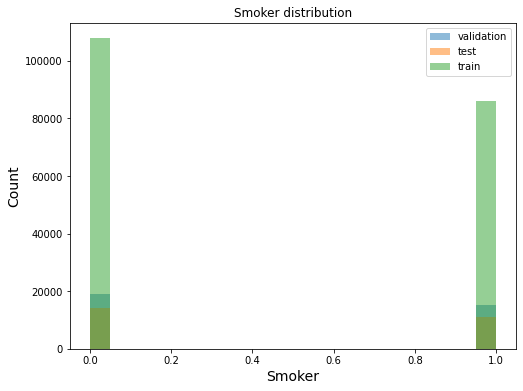

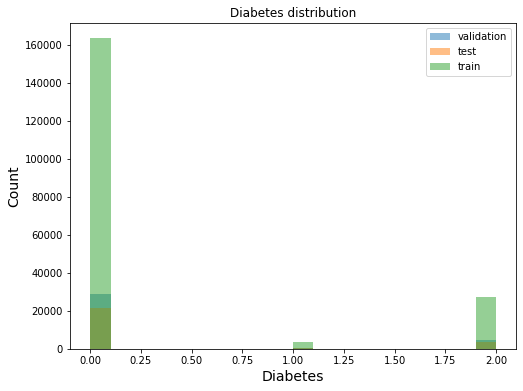

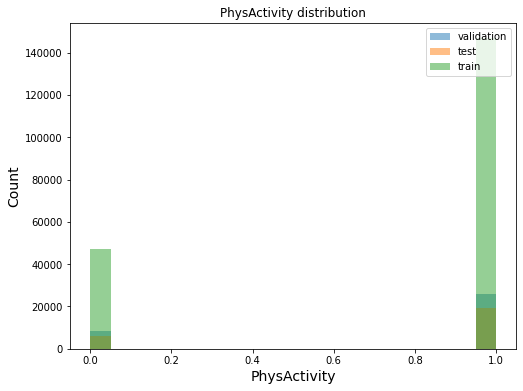

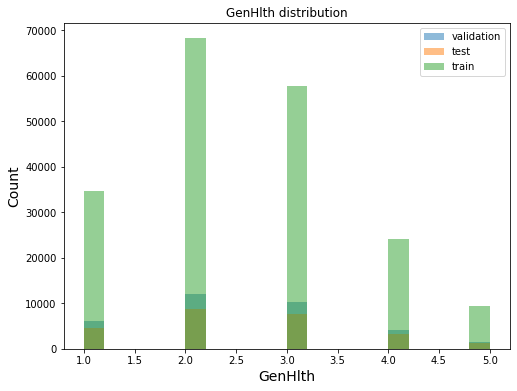

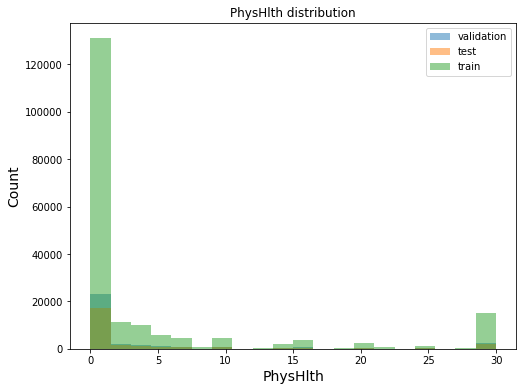

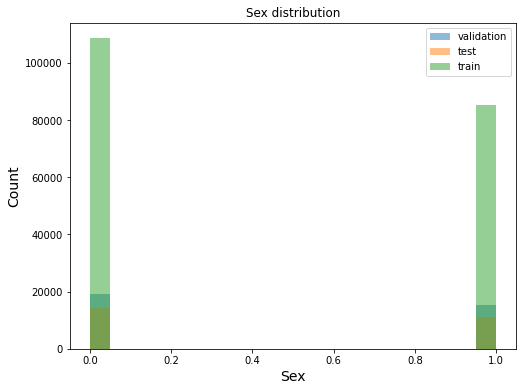

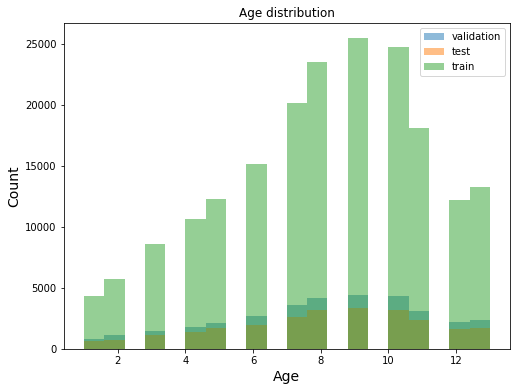

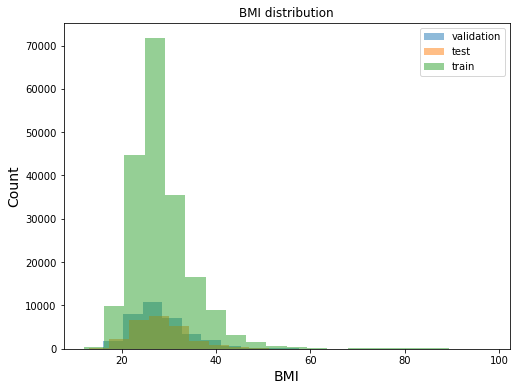

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

X_val_plot = X_val[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

X_train_plot = X_train[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
train.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
test.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')
print('Shape of the data is ', data.shape)


Shape of the data is  (253680, 22)


In [ ]:

# numerical fearures 
num_feats = ['BMI	', 'cholesterol', 'GenHlth',	'MentHlth',	'PhysHlth','Age','Education','Income']
# categorical features (binary)
bin_feats = ['HeartDiseaseorAttack',	'HighBP',	'HighChol',	'CholCheck','Smoker',	'Stroke','Diabetes'	,'PhysActivity',	'Fruits','AnyHealthcare',	'NoDocbcCost','Sex']
cat_feats =  bin_feats


In [ ]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
## Predicting data
y_pred=model.predict(X_test)

In [ ]:
## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     22925
         1.0       0.50      0.08      0.14      2443

    accuracy                           0.90     25368
   macro avg       0.71      0.54      0.54     25368
weighted avg       0.87      0.90      0.87     25368



IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Part 3 AutoML 

In [ ]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# code
df = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
# print first 5 rows of dataframe
 
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df['HeartDiseaseorAttack']= pd.Categorical(df.HeartDiseaseorAttack)

In [ ]:
# calculate total null values in every column
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
pip install h2o

     |████████████████████████████████| 177.0 MB 21 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=a79b6b070e5bf81b933b7e21e21a800c5bfadc38cb0db863711fa7b7af907dd9
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:

# install  and import H2o 
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps0msfyk1
  JVM stdout: /tmp/tmps0msfyk1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps0msfyk1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_777673
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# convert pandas DataFrame into H2O Frame
train_df = h2o.H2OFrame(df)
# Describe  the train h20Frame
train_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:253680
Cols:22




,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
mean,0.09418558814254178,0.4290011037527594,0.4241209397666351,0.9626695048880479,28.3823636076947,0.44316855881425415,0.04057079785556607,0.29692131819615203,0.7565436770734784,0.6342557552822453,0.811419899085462,0.05619678334910123,0.9510525070955534,0.08417691579943236,2.5113923052664684,3.1847721538946825,4.242080573951436,0.16822374645222327,0.4403421633554084,8.032119205298038,5.050433617155482,6.053874960580276
maxs,1.0,1.0,1.0,1.0,98.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0
sigma,0.29208731475075544,0.49493446268990143,0.4942098046568848,0.1895707543627255,6.608694201406012,0.49676066677856323,0.19729409940016235,0.6981597284091029,0.4291690433970456,0.48163918717043347,0.39117547168449074,0.2303017888952292,0.21575870631073912,0.277653500857625,1.0684773622803905,7.412846696196173,8.717951307175127,0.374065594732803,0.4964291631185051,3.0542204341684864,0.9857741757276509,2.0711475662715215
zeros,229787,144851,146089,9470,0,141257,243388,213703,61760,92782,47839,239424,12417,232326,0,175680,160052,211005,141974,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [ ]:
# code
test = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')
test = h2o.H2OFrame(test)
# selecting feature and label columns
 
x = test.columns
y = 'HeartDiseaseorAttack'
# remove label classvariable from feature variable
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function
aml = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
              
)
# train model and record time % time
aml.train(x = x, y = y, training_frame = train_df)

AutoML progress: |
00:08:12.22: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

████
00:08:37.432: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.


00:08:39.588: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

███
00:09:07.473: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before

In [ ]:

# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20220416_00811,0.263201,0.0692747,0.139034,0.184506,0.0692747
StackedEnsemble_BestOfFamily_4_AutoML_2_20220416_00811,0.263261,0.0693065,0.138999,0.184574,0.0693065
StackedEnsemble_AllModels_2_AutoML_2_20220416_00811,0.263288,0.0693204,0.138669,0.184533,0.0693204
StackedEnsemble_BestOfFamily_3_AutoML_2_20220416_00811,0.263335,0.0693455,0.138809,0.184578,0.0693455
GBM_grid_1_AutoML_2_20220416_00811_model_6,0.263499,0.0694319,0.14032,0.184499,0.0694319
StackedEnsemble_AllModels_1_AutoML_2_20220416_00811,0.263607,0.0694888,0.140075,0.184776,0.0694888
GBM_5_AutoML_2_20220416_00811,0.263615,0.0694928,0.139567,0.184794,0.0694928
StackedEnsemble_BestOfFamily_2_AutoML_2_20220416_00811,0.26367,0.0695218,0.140607,0.184877,0.0695218
GBM_2_AutoML_2_20220416_00811,0.263697,0.0695363,0.13947,0.184909,0.0695363
GBM_grid_1_AutoML_2_20220416_00811_model_2,0.263714,0.0695451,0.141272,0.184882,0.0695451


Stacked_ensemble comes out to be the top model of it

In [ ]:
# Get the top model of leaderboard
se = aml.leader
 
# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])
 
# list baselearner models :
metalearner.varimp()

The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id


[('GBM_grid_1_AutoML_2_20220416_00811_model_6',
  0.044786687940359116,
  1.0,
  0.3583171009645507),
 ('GBM_5_AutoML_2_20220416_00811',
  0.018378544598817825,
  0.41035730579791696,
  0.1470380401731332),
 ('XGBoost_3_AutoML_2_20220416_00811',
  0.011574070900678635,
  0.25842658684856146,
  0.09259866541174022),
 ('GBM_2_AutoML_2_20220416_00811',
  0.011285507120192051,
  0.2519835165132231,
  0.0902900031278711),
 ('XGBoost_grid_1_AutoML_2_20220416_00811_model_7',
  0.009584940969944,
  0.2140131679910766,
  0.07668457792280195),
 ('DeepLearning_1_AutoML_2_20220416_00811',
  0.009584914892911911,
  0.21401258574145537,
  0.07668436929280563),
 ('GBM_grid_1_AutoML_2_20220416_00811_model_2',
  0.008570387028157711,
  0.19136014343303526,
  0.0685676118350858),
 ('DeepLearning_grid_1_AutoML_2_20220416_00811_model_2',
  0.0041704606264829636,
  0.09311830854821464,
  0.03336588236571881),
 ('DeepLearning_grid_1_AutoML_2_20220416_00811_model_1',
  0.0030937157571315765,
  0.069076681027

Using SHap for interpretation for tree based models

In [ ]:
#import dataset
data = pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")

#assign target variable and features
y = data['HeartDiseaseorAttack']
X = data.drop('HeartDiseaseorAttack', axis=1)


In [ ]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X,y)

XGBRegressor(objective='reg:squarederror')

In [ ]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

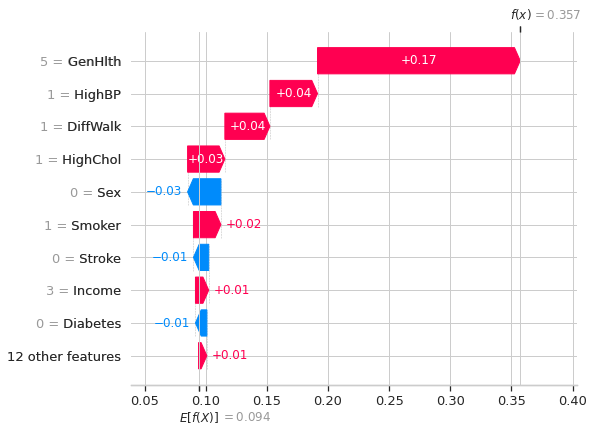

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

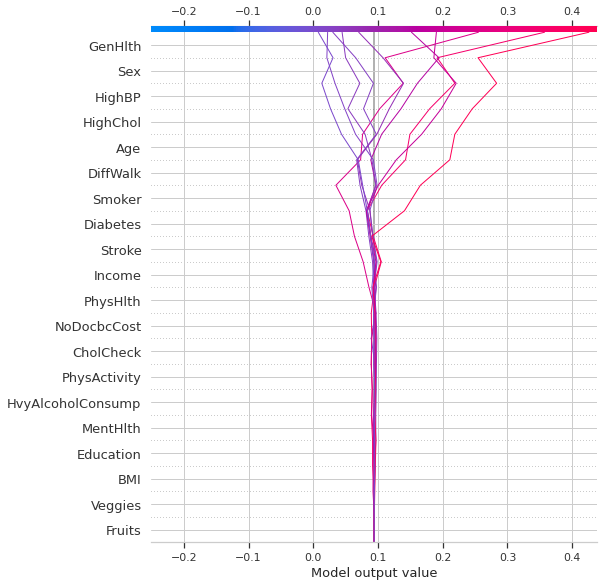

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

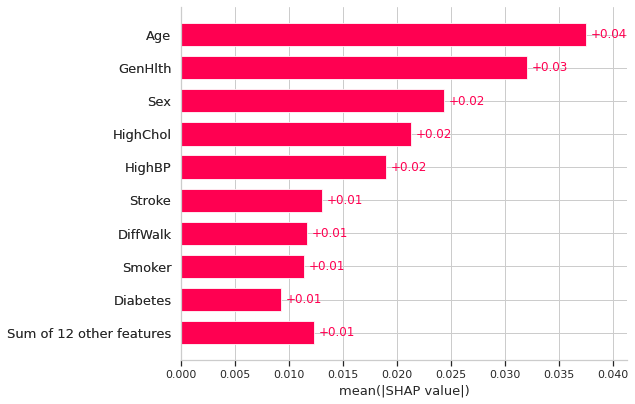

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

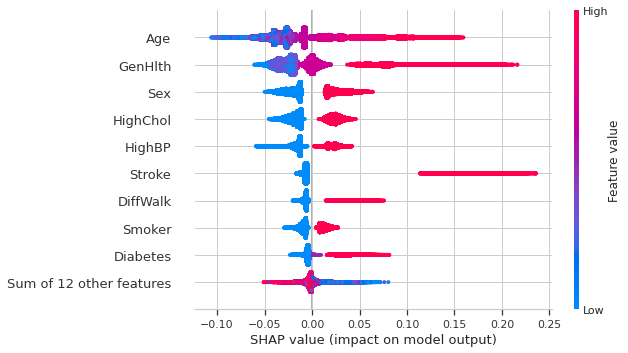

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

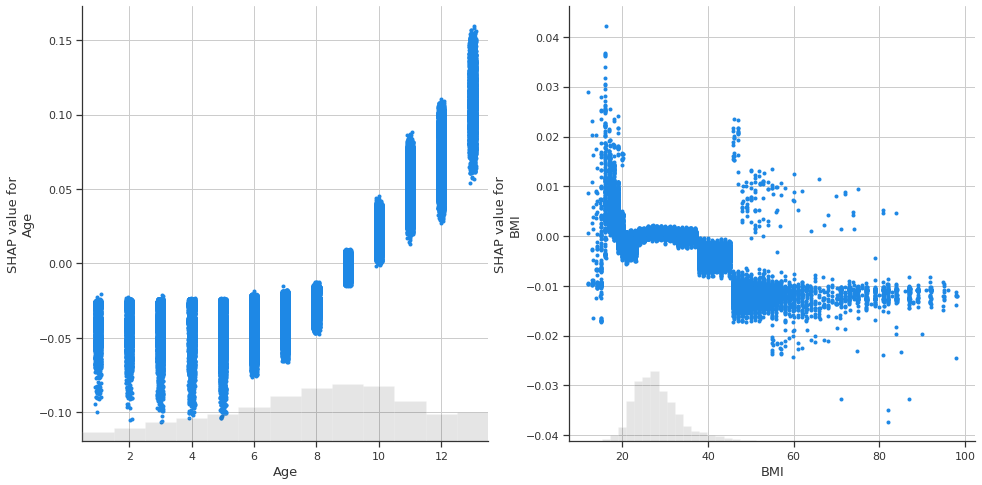

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

#SHAP scatter plots
shap.plots.scatter(shap_values[:,"Age"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"BMI"],ax=ax[1])



In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier

catboost version: 1.0.5


In [ ]:
pip install catboost

CatBoostClassifier

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')

data_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# map categorical features
data_catboost_ready_df = data_df.dropna()

features = [ feat for feat in list(data_catboost_ready_df)
                if feat != 'HeartDiseaseorAttack']
print(features)

X_train, X_test, y_train,y_test = train_test_split(data_df[features],
                                                   data_df[['HeartDiseaseorAttack']],
                                                   test_size=0.3,
                                                   random_state=1)  


params = { 'iterations': 5000,
          'learning_rate': 0.01,
          'depth':3,
          'eval_metric':'AUC',
          'verbose': 200,
          'od_type': "Iter", # overfit detector
          'od_wait': 500,
          'random_seed':1

}

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              plot=True
              );



['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7653804	best: 0.7653804 (0)	total: 90ms	remaining: 7m 29s
200:	test: 0.8453816	best: 0.8454151 (199)	total: 9.98s	remaining: 3m 58s
400:	test: 0.8477931	best: 0.8477931 (400)	total: 17.8s	remaining: 3m 23s
600:	test: 0.8491780	best: 0.8491780 (600)	total: 25.8s	remaining: 3m 8s
800:	test: 0.8499702	best: 0.8499702 (800)	total: 33.9s	remaining: 2m 57s
1000:	test: 0.8503802	best: 0.8503802 (1000)	total: 43s	remaining: 2m 51s
1200:	test: 0.8506091	best: 0.8506091 (1200)	total: 51.2s	remaining: 2m 41s
1400:	test: 0.8507497	best: 0.8507497 (1400)	total: 59.8s	remaining: 2m 33s
1600:	test: 0.8507523	best: 0.8507605 (1456)	total: 1m 8s	remaining: 2m 24s
1800:	test: 0.8507824	best: 0.8507824 (1800)	total: 1m 17s	remaining: 2m 16s
2000:	test: 0.8508156	best: 0.8508156 (2000)	total: 1m 26s	remaining: 2m 8s
2200:	test: 0.8508423	best: 0.8508432 (2191)	total: 1m 35s	remaining: 2m
2400:	test: 0.8508770	best: 0.8508775 (2399)	total: 1m 45s	remaining: 1m 53s
2600:	test: 0.8509186	best: 0.8